In [63]:
import pywikibot
import random
import requests
import pandas as pd
import re, json
import seaborn as sns

## Assessments

In [13]:
random.seed(12)
amount = 100
items = []
for i in range(amount):
    searching = True
    while searching:
        rnd = random.randint(1,105301058) #from Wikidata:Statistics - Wikidata currently contains 105,301,058 items
        itemid = "Q"+str(rnd)
        if itemid not in items:
            items.append(itemid)
            searching=False
    try:
        site = pywikibot.Site("wikidata", "wikidata")
        repo = site.data_repository()
        item = pywikibot.ItemPage(repo, itemid)
    except:
        print(itemid)

itemshtml = ["https://www.wikidata.org/wiki/Special:EntityData/"+i for i in items]
itemsjsonld = ["https://www.wikidata.org/wiki/Special:EntityData/"+i+".jsonld" for i in items]

In [14]:
def FAIRChecker_allmetrics(payload):
    global count
    print(count)
    FAIR_checker_api = "https://fair-checker.france-bioinformatique.fr/api/check/metrics_all"
    try:
        response = requests.get(FAIR_checker_api, params=payload)
        print(payload)
        print(response.status_code)
        print("________________")
        count += 1
        return response.json(), response.status_code
    except:
        status = 504
        print(payload)
        print(status)
        print("________________")
        count += 1
        return None, status

In [15]:
count = 0

df = pd.DataFrame()
df["itemid"] = items
df["itemhtml"] = itemshtml
df["itemsjsonld"] = itemsjsonld

assessment_results_html = df['itemhtml'].map(lambda x: FAIRChecker_allmetrics(payload={'url': x}))
df['html_FAIRChecker_result'] = [aresult[0] for aresult in assessment_results_html]
df['html_FAIRChecker_status'] = [aresult[1] for aresult in assessment_results_html]
assessment_results_jsonld = df['itemsjsonld'].map(lambda x: FAIRChecker_allmetrics(payload={'url': x}))
df['jsonld_FAIRChecker_result'] = [aresult[0] for aresult in assessment_results_jsonld]
df['jsonld_FAIRChecker_status'] = [aresult[1] for aresult in assessment_results_jsonld]

df

0
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q63695799'}
200
________________
1
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q36103892'}
200
________________
2
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q88244466'}
200
________________
3
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q71018731'}
200
________________
4
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q89444100'}
200
________________
5
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q46947399'}
200
________________
6
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q19139496'}
200
________________
7
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q51222992'}
200
________________
8
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q1457664'}
200
________________
9
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q50298697'}
200
________________
10
{'url': 'https://www.wikidata.org/wiki/Special:EntityData/Q64765264'

,itemid,itemhtml,itemsjsonld,html_FAIRChecker_result,html_FAIRChecker_status,jsonld_FAIRChecker_result,jsonld_FAIRChecker_status
0,Q63695799,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504
1,Q36103892,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504
2,Q88244466,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200
3,Q71018731,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200
4,Q89444100,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504
...,...,...,...,...,...,...,...
95,Q51125584,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200
96,Q57734344,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200
97,Q4390904,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200
98,Q69658640,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200


In [20]:
user = "marina"
pw = "testingfuji"
fuji_server = "http://localhost:1071/fuji/api/v1/evaluate"

In [21]:
def FUJI_build_result_json(result):
    if result is None:
        return None
    res = []
    for r in result:
        r_dict = {}
        r_dict["metric"] = r.get("metric_identifier")
        r_dict["score_earned"] = r.get("score").get("earned")
        r_dict["score_total"] = r.get("score").get("total")
        res.append(r_dict)
    return res

In [28]:
def FUJI_assessment(payload):
    global count
    print(count)
    print(payload)
    payload = {
        "metadata_service_type": "sparql",
        "object_identifier": payload,
        "test_debug": True,
        "use_datacite": True
    }
    response = requests.post(
        url = fuji_server,
        json = payload,
        auth = (user, pw)
    )
    result = FUJI_build_result_json(response.json().get("results"))
    count = count + 1
    print("__________________________")
    return result

In [37]:
count = 0
df["html_FUJI_result"] = df['itemhtml'].map(lambda x: FUJI_assessment(x))
df["jsonld_FUJI_result"] = df['itemsjsonld'].map(lambda x: FUJI_assessment(x))
df.to_csv("assessed_data/wikidata_df.csv", encoding="UTF-8")
df

0
https://www.wikidata.org/wiki/Special:EntityData/Q63695799
__________________________
1
https://www.wikidata.org/wiki/Special:EntityData/Q36103892
__________________________
2
https://www.wikidata.org/wiki/Special:EntityData/Q88244466
__________________________
3
https://www.wikidata.org/wiki/Special:EntityData/Q71018731
__________________________
4
https://www.wikidata.org/wiki/Special:EntityData/Q89444100
__________________________
5
https://www.wikidata.org/wiki/Special:EntityData/Q46947399
__________________________
6
https://www.wikidata.org/wiki/Special:EntityData/Q19139496
__________________________
7
https://www.wikidata.org/wiki/Special:EntityData/Q51222992
__________________________
8
https://www.wikidata.org/wiki/Special:EntityData/Q1457664
__________________________
9
https://www.wikidata.org/wiki/Special:EntityData/Q50298697
__________________________
10
https://www.wikidata.org/wiki/Special:EntityData/Q64765264
__________________________
11
https://www.wikidata.org/wiki

,itemid,itemhtml,itemsjsonld,html_FAIRChecker_result,html_FAIRChecker_status,jsonld_FAIRChecker_result,jsonld_FAIRChecker_status,html_FUJI_result,jsonld_FUJI_result
0,Q63695799,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
1,Q36103892,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
2,Q88244466,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
3,Q71018731,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
4,Q89444100,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,None,504,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
...,...,...,...,...,...,...,...,...,...
95,Q51125584,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
96,Q57734344,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
97,Q4390904,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
98,Q69658640,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'F1A', 'score': '2', 'target_uri':...",200,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."


## Evaluation

In [67]:
df = pd.read_csv("assessed_data/wikidata_df.csv", encoding="UTF-8", index_col=0)
df = df[df["jsonld_FAIRChecker_status"]==200].reset_index(drop=True)
df = df.drop(["html_FAIRChecker_status", "jsonld_FAIRChecker_status"], axis=1)
df

,itemid,itemhtml,itemsjsonld,html_FAIRChecker_result,jsonld_FAIRChecker_result,html_FUJI_result,jsonld_FUJI_result
0,Q88244466,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
1,Q71018731,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
2,Q46947399,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '0', 'target_uri':...","[{'metric': 'F1A', 'score': '0', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
3,Q19139496,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
4,Q51222992,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
...,...,...,...,...,...,...,...
89,Q51125584,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
90,Q57734344,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
91,Q4390904,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
92,Q69658640,https://www.wikidata.org/wiki/Special:EntityDa...,https://www.wikidata.org/wiki/Special:EntityDa...,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."


In [68]:
df_FC = pd.DataFrame()
df_FC["itemid"] = df["itemid"]
df_FC["html_result"] = df["html_FAIRChecker_result"]
df_FC["jsonld_result"] = df["jsonld_FAIRChecker_result"]
df_FC

,itemid,html_result,jsonld_result
0,Q88244466,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
1,Q71018731,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
2,Q46947399,"[{'metric': 'F1A', 'score': '0', 'target_uri':...","[{'metric': 'F1A', 'score': '0', 'target_uri':..."
3,Q19139496,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
4,Q51222992,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
...,...,...,...
89,Q51125584,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
90,Q57734344,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
91,Q4390904,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."
92,Q69658640,"[{'metric': 'F1A', 'score': '2', 'target_uri':...","[{'metric': 'F1A', 'score': '2', 'target_uri':..."


In [69]:
df_FJ = pd.DataFrame()
df_FJ["itemid"] = df["itemid"]
df_FJ["html_result"] = df["html_FUJI_result"]
df_FJ["jsonld_result"] = df["jsonld_FUJI_result"]
df_FJ

,itemid,html_result,jsonld_result
0,Q88244466,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
1,Q71018731,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
2,Q46947399,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
3,Q19139496,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
4,Q51222992,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
...,...,...,...
89,Q51125584,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
90,Q57734344,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
91,Q4390904,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."
92,Q69658640,"[{'metric': 'FsF-F1-01D', 'score_earned': 1, '...","[{'metric': 'FsF-F1-01D', 'score_earned': 1, '..."


In [105]:
def get_results_FCdf(df, i, res_column):
    assessments = re.findall("'metric': '.*?', 'score': '.*?'", df.iloc[i][res_column])
    result_df = pd.DataFrame()
    metrics = []
    scores = []
    for result in assessments:
        res = "{"+result.replace("\'", "\"")+"}"
        jsn_res = json.loads(res)
        metrics.append(jsn_res["metric"])
        scores.append(int(jsn_res["score"]))
    result_df["metric"] = metrics
    result_df["score"] = scores
    return result_df


def get_results_FJdf(df, i, res_column):
    result_df = pd.DataFrame()
    metrics = []
    scores_earned = []
    scores_total = []
    jsn_res = json.loads(df.iloc[i][res_column].replace("\'", "\""))
    for res in jsn_res:
        metrics.append(res["metric"])
        scores_earned.append(int(res["score_earned"]))
        scores_total.append(int(res["score_total"]))
    result_df["metric"] = metrics
    result_df["score_earned"] = scores_earned
    result_df["score_total"] = scores_total
    return result_df


def get_principle(metric, startstr):
    if metric.startswith(startstr[0]):
        return "findable"
    elif metric.startswith(startstr[1]):
        return "accessible"
    elif metric.startswith(startstr[2]):
        return "interoperable"
    else:
        return "reusable"

    
def get_long_df(df, get_results_df, cols, startstr):
    df_long = pd.DataFrame(columns=cols)
    for i in range(len(df)):
        html_df = get_results_df(df, i, "html_result")
        jsonld_df = get_results_df(df, i, "jsonld_result")
        htmljsonld_df = pd.merge(html_df, jsonld_df, on="metric", suffixes=("_html", "_jsonld"))
        htmljsonld_df["principle"] = htmljsonld_df["metric"].apply(lambda x: get_principle(x, startstr))
        htmljsonld_df["itemid"] = df.iloc[i]["itemid"]
        df_long = pd.concat([df_long, htmljsonld_df], ignore_index=True)
    return df_long

In [113]:
df_FC_long = get_long_df(df_FC, get_results_FCdf, ["itemid", "metric", "score_html", "score_jsonld"], ["F", "A", "I"])
df_FJ_long = get_long_df(df_FJ, get_results_FJdf, ["itemid", "metric", "score_earned_html", "score_total_html", "score_earned_jsonld", "score_total_jsonld"], ["FsF-F", "FsF-A", "FsF-I"])

FAIR-Checker metrics: F1A, F1B, F1A, F1B, A1.1, A1.2, I1, I2, I3, R1.1, R1.2, R1.3 (all max 2 points)

In [116]:
#df_FC_principle = df_FC_long[["principle", "score_html", "score_jsonld"]].groupby("principle").mean().reset_index()
#df_FC_metric = df_FC_long[["metric", "score_html", "score_jsonld"]].groupby("metric").mean().reset_index()

In [127]:
df_FC_item = df_FC_long[["itemid", "score_html", "score_jsonld"]].groupby("itemid").sum().reset_index()
df_FC_item = pd.wide_to_long(df_FC_item, stubnames="score", i="itemid", j="doctype", sep="_", suffix=r'\w+').reset_index()
df_FC_item["score-pct"] = df_FC_item["score"]/24

df_FJ_item = df_FJ_long[["itemid", "score_earned_html", "score_total_html", "score_earned_jsonld", "score_total_jsonld"]].groupby("itemid").sum().reset_index()
df_FJ_item = pd.wide_to_long(df_FJ_item, ["score_earned", "score_total"], i="itemid", j="doctype", sep="_", suffix=r'\w+').reset_index()
df_FJ_item["score-pct"] = df_FJ_item["score_earned"]/df_FJ_item["score_total"]
df_FJ_item = df_FJ_item.rename(columns={"score_earned": "score"})
df_FJ_item = df_FJ_item.drop(columns="score_total")

df_FCFJ_item = pd.merge(df_FC_item, df_FJ_item, on=["itemid", "doctype"], suffixes=("_FC", "_FJ"))
df_FCFJ_item = pd.wide_to_long(df_FCFJ_item, ["score", "score-pct"], i=["itemid", "doctype"], j="tool", sep="_", suffix=r'\w+').reset_index()
df_FCFJ_item

,itemid,doctype,tool,score,score-pct
0,Q10013936,html,FC,4,0.166667
1,Q10013936,html,FJ,6,0.250000
2,Q102687568,html,FC,0,0.000000
3,Q102687568,html,FJ,1,0.041667
4,Q11094955,html,FC,4,0.166667
...,...,...,...,...,...
371,Q92689777,jsonld,FJ,7,0.291667
372,Q93527542,jsonld,FC,15,0.625000
373,Q93527542,jsonld,FJ,7,0.291667
374,Q97486018,jsonld,FC,13,0.541667


<Axes: xlabel='tool', ylabel='score-pct'>

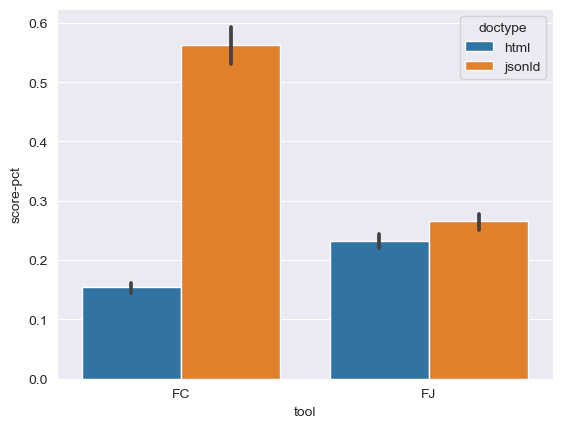

In [135]:
sns.set_style("darkgrid")
sns.barplot(df_FCFJ_item, x="tool", y="score-pct", hue="doctype")